7월 20일 세미나 1
======

1장 요약
-----

2장요약
----

1. 히스토그램

---

명암영상에서 히스토그램이란 각 명암값 또는 rgb값이 픽셀에서 몇번 나타나는지 측정.


영상의 특성을 파악하는데 사용한다.

ex) 히스토그램에 봉우리가 명확하면 이진화가 쉽다!

명암 영상에서 히스토그램 측정.

cv2.calcHist(images, channels, mask, histSize, ranges[,hist[, accumulate]])

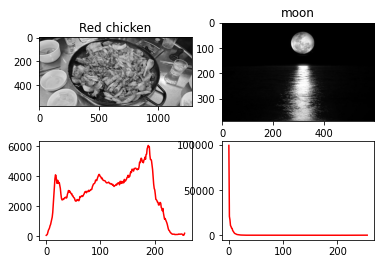

In [28]:
#ex) 명암영상에서 히스토그램

import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('./data/redchicken.jpg',0)# flag 값으로 0을 붙이면 명암 영상.
img2 = cv2.imread('./data/moon.jpg',0)# flag 값으로 0을 붙이면 명암 영상.

hist1 = cv2.calcHist([img1],[0],None,[256],[0,256])
hist2 = cv2.calcHist([img2],[0],None,[256],[0,256])

plt.subplot(221),plt.imshow(img1,'gray'),plt.title('Red chicken')
plt.subplot(222),plt.imshow(img2,'gray'),plt.title('moon')

plt.subplot(223),plt.plot(hist1,color='r')
plt.subplot(224),plt.plot(hist2,color='r')
plt.show()
#plt.subplot은 위치를 정해준다.

#그림은 이미 이진화가 된것이라, 봉우리를 찾기가 어렵다?

---
- 1-2. 히스토그램 평활화
---

히스토그램은 조작을 통해 영상 품질 개선도 한다.



- 개념1 : 정규 히스토그램.
     
     명암을 전체 픽셀수로 나눔. [명암의 확률값이라 생각하면 된다.]
     

- 개념2 : 히스토그램 평활화

    히스토그램의 동적범위를 넓혀,
    
    평평하게 만들고 영상이 선명해진다!
    (동적범위란, 명암값의 범위를 말함. plot의 x축)

    1) 명암의 이산확률을 구한다.

    2) 누적확률을 구한다.

    3) 누적확률x(L-1)의 반올림



In [ ]:
#ex) 히스토그램 평활화



- 1-3. 히스토그램 역투영(backprojection)과 얼굴 검출
---
히스토그램을 이용한 물체 검출.

히스토그램 역투영을 적용해, 다른 사람의 얼굴을 찾아보자.

명암은 사용안한다. 사람의 얼굴에 같은 명암값이 여럿 있다.

그래서, rgb 공간을 hsi(H:색상,S:채도,I:명암)으로 바꾸고, 명암을 빼서 사용한다.

h와 s 2차원 히스토그램을 그러서 사용한다.


- 개념1. 양자화: 

    h와 s축이 수가 너무크면 대부분이 0칸이다.

    그래서, 칸을 축소시키는 방법이다.
    잘모르겠다..
    

- 개념2. 히스토그램 역투영

    원리: 어떤 픽셀의 h와 s 채널값을 알때, 모델의 h`( h,s ) 확률이 높으면, 얼굴의 픽셀일 확률이 높다!
        1) 모델을 양자화 후, 정규 히스토그램으로 만든다.
        
        2) 모델 h`(h,s)/ 영상 h`(h,s)로 비율히스토그램을 구해 역투영한다.
    


In [1]:
#ex) 히스토그램 역투영
import cv2
from matplotlib import pyplot as plt

# 모델 이미지 준비, 히스토그램 작성
skin = cv2.imread('face.jpg') #모델 이미지
hsv_skin = cv2.cvtColor(skin,cv2. #HSI
img = cv2.imread('pictures.jpg')
hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

